In [5688]:
import cv2
import pytesseract
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [5689]:
img_file="passport/1.jpg"
img=cv2.imread(img_file)


In [5690]:
def display(img_file):
    dpi=200
    img_data=cv2.imread(img_file)
    height,width=img_data.shape[:2]
    figsize=width/float(dpi),height/float(dpi)
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img_data,cmap='grey')
    plt.show()


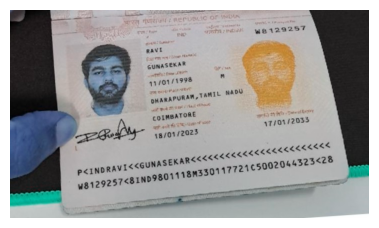

In [5691]:
display("passport/1.jpg")

## 00.ReScaling


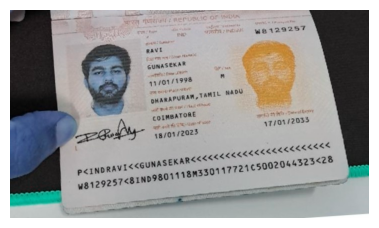

In [5692]:
scale_factor = 1
new_width = int(img.shape[1] * scale_factor)
new_height = int(img.shape[0] * scale_factor)
new_size = (new_width, new_height)
resized_image = cv2.resize(img, new_size, interpolation=cv2.INTER_CUBIC)
cv2.imwrite("temp/passport_resized.jpg", resized_image)
display("temp/passport_resized.jpg")



## 01.greyscaling

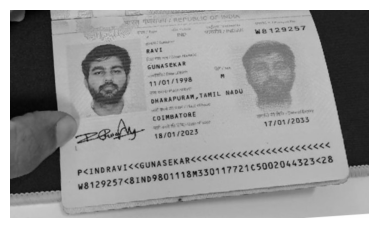

In [5693]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite("temp/pass_gray.jpg",gray)
display("temp/pass_gray.jpg")

## 02.applying threshold

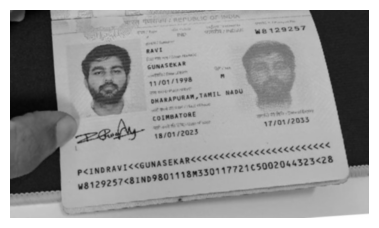

In [5694]:
blur=cv2.GaussianBlur(gray,[3,3],0)
cv2.imwrite("temp/pass_blur.jpg",blur)
display("temp/pass_blur.jpg")

In [5695]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,15))
#import numpy as np
#sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#sharpened = cv2.filter2D(blur, -1, kernel)

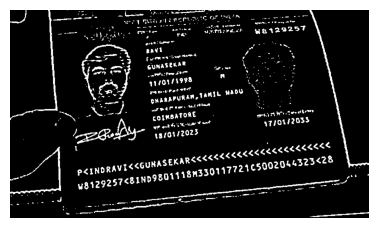

In [5696]:
thresh=cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10)
cv2.imwrite("temp/pass_thresh.jpg",thresh)
display("temp/pass_thresh.jpg")

## 03.Denoising

In [5697]:
'''def noise_removal(image):
    image=cv2.dilate(image,kernel,iterations=1)
    image=cv2.erode(image,kernel,iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image,3)
    return(image)'''

'def noise_removal(image):\n    image=cv2.dilate(image,kernel,iterations=1)\n    image=cv2.erode(image,kernel,iterations=1)\n    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)\n    image=cv2.medianBlur(image,3)\n    return(image)'

In [5698]:
'''no_noise=noise_removal(thresh)
cv2.imwrite("temp/pass_no_noise.jpg",no_noise)
display("temp/pass_no_noise.jpg")'''

'no_noise=noise_removal(thresh)\ncv2.imwrite("temp/pass_no_noise.jpg",no_noise)\ndisplay("temp/pass_no_noise.jpg")'

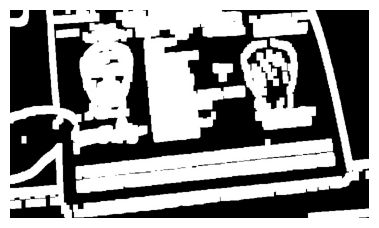

In [5699]:
dilate=cv2.dilate(thresh,kernel,iterations=1)
cv2.imwrite("temp/pass_dilate.jpg",dilate)
display("temp/pass_dilate.jpg")

In [5700]:
cnts=cv2.findContours(dilate,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts=cnts[0 if len(cnts)==2 else cnts[1]]
cnts=sorted(cnts,key=lambda x:cv2.boundingRect(x))

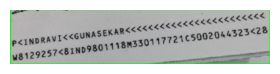

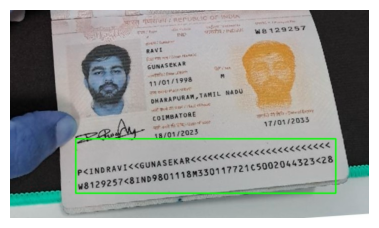

In [5701]:
import numpy as np
base_img=img.copy()
for c in cnts:
    x,y,w,h=cv2.boundingRect(c)
    area=cv2.contourArea(c)
    if 28500>area>28000:
        cv2.rectangle(base_img,(x,y),(x+w,y+h),(0,255,0),2)
        roi=base_img[y:y+h,x:x+w]
   

cv2.imwrite("temp/pass_crop.jpg",roi)
display("temp/pass_crop.jpg")        
cv2.imwrite("temp/pass_boxes.jpg",base_img)
display("temp/pass_boxes.jpg")        

In [5702]:

ocr_result=pytesseract.image_to_string(roi)
print(ocr_result)

aaa Rae
TAT TZACSOOZOSKSZS<2®

pcINDRAVI<<6
98011186330

wg129257<BIND

ee


